In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# from sqlalchemy import create_engine, MetaData, Table, Column, ForeignKey

In [5]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1553c7796a0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [11]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1553c779e20>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
# session.query(Measurement.station, Measurement.prcp, Measurement.date).\
#     filter(Measurement.prcp > .0).\
#     order_by((Measurement.date).desc()).all()
# '2017-08-23'

In [14]:
results = session.query(func.round(func.sum(Measurement.prcp),2), Measurement.date).\
    filter(Measurement.date > '2016-08-22').\
    group_by(Measurement.date).\
    order_by((Measurement.date).desc()).all()
#results

In [15]:
prcp_date_df = pd.DataFrame(results, columns=['prcp','date'])
prcp_date_df.set_index('date', inplace=True, )
prcp_date_df['prcp'] = prcp_date_df['prcp'].fillna(0)
prcp_date_df.head(10)

,prcp
date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09
2017-08-18,0.06
2017-08-17,0.19
2017-08-16,0.61
2017-08-15,0.82


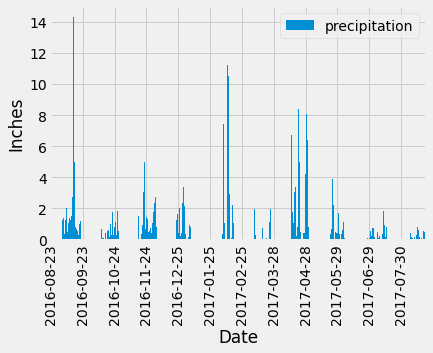

In [16]:
prcp_date_df.iloc[::-1].plot.bar(title="")
#plt.tight_layout()
   
plt.locator_params(axis="x", nbins=12)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'], loc='upper right')
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#prcp_date_df.groupby("date").agg({"prcp": ["mean", "median", "var", "std", "sem"]})
prcp_date_df.agg({"prcp": ["mean", "median", "var", "std", "sem"]})

,prcp
mean,0.978907
median,0.405000
var,3.155417
std,1.776349
sem,0.092851


In [18]:
# Design a query to show how many stations are available in this dataset?
results = session.query(Station.station).\
    group_by(Station.station).count()

results    

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).all()

results   

# results = session.query(func.count(Measurement.station)).\
#    filter(Measurement.station == 'USC00519281')
# results.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
results = session.query(Measurement.station,\
                        func.min(Measurement.tobs),\
                        func.max(Measurement.tobs),\
                        func.round(func.avg(Measurement.tobs),1)).\
    filter(Measurement.station == 'USC00519281')

results.all()  

[('USC00519281', 54.0, 85.0, 71.7)]

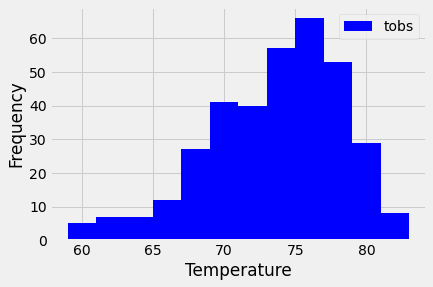

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#results = session.query(Measurement.station, func.count(Measurement.tobs)).\
#    group_by(Measurement.station).\
#    order_by((func.count(Measurement.tobs)).desc()).first()

#results   

results = session.query(Measurement.tobs).\
     filter(Measurement.station == 'USC00519281').\
     filter(Measurement.date > '2016-08-22').\
     order_by((Measurement.date).asc()).all()

#results
results = [id for id, in results]
#results

# show the histogram
fig, ax1 = plt.subplots()
#plt.title('12 months of Temperature Observations')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.hist(results, bins=12, rwidth=1.0, color="blue")
plt.legend(['tobs'], loc='upper right')
plt.show()


In [25]:
results = session.query(Station.station, Station.name).all()
results
resultslist = session.query(func.min(Measurement.tobs),\
                                func.max(Measurement.tobs),\
                                func.round(func.avg(Measurement.tobs),1)).\
                                filter(Measurement.date >= '2016-08-23')
resultslist.all()

[(58.0, 87.0, 74.6)]

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
